# PyCalcolAr
### Inizializzazione

In [934]:
# Importare le librerie utili per la creazione del codice
import pandas as pd
import numpy as np
import math 
from IPython.display import display

# Variabili utilizzate nel calcolo, da modificare manualmente dall'utente  
delay = 105

### Importazione files
### > file triplo36 (file di calibrazione dell'aria)

In [935]:
# definire il percorso del file
file_path = "../test_data/Triplo36.txt"

# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0', 'Run', 'Path']

# trasformare le colonne in dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)

# Conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)

airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
airpipette_data.loc[:,'36F'] = airpipette_data.loc[:,'36F'].values / 62415000
airpipette_data.loc[:,'err 36F'] = airpipette_data.loc[:,'err 36F'].values / 62415000


display(airpipette_data)

Air pipette initial imported data:


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
0,Sample Name,2015-10-06 10:33:00,0.73900,0.00400,0.000799,9.292638e-07,0.001154,0.000004,0.004150,0.000003,0.002307,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2015-10-06 10:52:00,1.22000,0.00041,0.000796,9.613074e-07,0.001211,0.000003,0.004134,0.000003,0.004021,0.000014,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-10-06 11:23:00,1.22000,0.00051,0.000798,8.171113e-07,0.001230,0.000003,0.004150,0.000002,0.004021,0.000015,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-10-08 10:13:00,0.75800,0.00400,0.000796,8.811984e-07,0.001067,0.000004,0.004134,0.000002,0.002307,0.000018,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-10-08 10:27:00,1.09000,0.00036,0.000694,1.009373e-06,0.000974,0.000003,0.003589,0.000002,0.003525,0.000022,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Sample Name,2020-06-23 11:02:00,1.65538,0.00053,0.000886,1.265721e-06,0.004927,0.000004,0.004775,0.000004,0.005568,0.000018,Raw data stored in - C:\Nu Noble\Results\Data...
830,Sample Name,2020-06-24 09:25:00,1.65331,0.00043,0.000884,1.441961e-06,0.004896,0.000004,0.004765,0.000005,0.005594,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
831,Sample Name,2020-06-24 09:50:00,1.65039,0.00049,0.000891,1.313787e-06,0.004914,0.000003,0.004798,0.000004,0.005575,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
832,Sample Name,2020-06-24 10:08:00,1.64847,0.00056,0.000891,1.009373e-06,0.004916,0.000004,0.004792,0.000004,0.005553,0.000022,Raw data stored in - C:\Nu Noble\Results\Data...


### > file run4 e run22 (file di misura)

In [936]:
# definire la lista con gli indici delle colonne 
column_names_run4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']
column_names_run22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']

# definire il percorso dei file
file_path_4 = "../test_data/Run4.txt"
file_path_22 = "../test_data/Run22.txt"

# importare i file run
df_data_4 = pd.read_csv(file_path_4, header = None, index_col= False, names = column_names_run4, sep = '\t|,', engine = 'python')
df_data_22 = pd.read_csv(file_path_22, header = None, index_col= False, names = column_names_run22, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne
df_data_4 = df_data_4.replace(["{", "}"], ["", ""], regex=True)
df_data_22 = df_data_22.replace(["{", "}"], ["", ""], regex=True)

# definire nome delle colonne che contengono dati numerici
colnames_numeric_4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']   
colnames_numeric_22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_4:
    df_data_4[i] = pd.to_numeric(df_data_4[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_22:
    df_data_22[i] = pd.to_numeric(df_data_22[i])

df_data = pd.concat([df_data_4, df_data_22], axis=0)

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)

display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,36Ar IC0,err36Ar IC0,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,fishcanyon bt stp1,2015-04-08 16:03:00,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,0.002610,1.300000e-06,0.000097,0.000016,0.000021,7.700000e-08,0.000013,6.000000e-08,2.460000e-04,1.600000e-06,-5.380000e-09,6.600000e-09,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,Raw data stored in - C:\Nu Noble\Results\Data...
1,fishcanyon bt stp2,2015-04-08 16:33:00,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,0.006510,2.500000e-06,0.002540,0.000011,0.000023,8.300000e-08,0.000014,7.100000e-08,9.520000e-04,4.800000e-06,6.160000e-08,1.000000e-08,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-04-08 17:28:00,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,0.003050,1.400000e-06,0.002350,0.000012,0.000013,6.900000e-08,0.000014,7.500000e-08,5.420000e-04,2.400000e-06,9.320000e-09,8.200000e-09,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-04-09 11:39:00,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,0.000259,2.900000e-07,0.000094,0.000012,0.000010,5.500000e-08,0.000012,5.900000e-08,4.350000e-05,2.800000e-07,4.380000e-06,4.400000e-08,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-04-09 12:11:00,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,0.001700,8.900000e-07,0.000375,0.000012,0.000098,1.600000e-07,0.000013,6.400000e-08,7.700000e-09,7.600000e-09,-3.530000e-09,6.400000e-09,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,BAL-T12 LG ST2,2020-06-23 15:31:00,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,0.000881,8.000000e-07,0.037940,0.000022,0.000009,9.300000e-08,0.000018,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,Raw data stored in - C:\Nu Noble\Results\Data...
1334,BAL-T12 LG ST3,2020-06-23 15:57:00,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,0.000268,4.100000e-07,0.040472,0.000021,0.000008,7.600000e-08,0.000018,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
1335,BAL-T12 LG ST6,2020-06-23 17:08:00,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,0.000749,6.800000e-07,0.051242,0.000025,0.000012,9.200000e-08,0.000018,1.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
1336,BAL-T12 ST7,2020-06-23 17:26:00,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,0.000581,6.800000e-07,0.121323,0.000043,0.000010,7.800000e-08,0.000019,1.100000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare dati misurati per data e ora per selezionare un solo campione
#### Verificare correttezza della selezione nel dataframe visualizzato!!

In [937]:
# filtrare il dataframe per data 
filter_data_min = pd.Timestamp(year=2016, month=9, day=12, hour=6)
filter_data_max = pd.Timestamp(year=2016, month=9, day=12, hour=22)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)
df_data.sort_values('Date_Time', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

print("\n   > df_data:")
display(df_data)

# opzione con selezione manuale da lista dropdown
# filtrare il dataframe per data, prendendo una sola riga 
# import ipywidgets as widgets
# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
# data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
#                  value=airpipette_data['Date_Time'].to_list()[-1],
#                  description='Date_Time of calibration:',
#                  disabled=False)
# data_w = data_w.value

# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
sample_min = min(df_data['Date_Time'].to_list())
older_calibration_df = airpipette_data[airpipette_data['Date_Time'] < sample_min]
data_w = max(older_calibration_df['Date_Time'].to_list())

airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w]
calibration_data = airpipette_data_filtered 

print("\n\n   > calibration_data:")
display(calibration_data)


   > df_data:


,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,36Ar IC0,err36Ar IC0,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,Sample Name,2016-09-12 13:18:00,1.850000,0.001100,0.002530,1.800000e-06,2.460000e-07,1.200000e-08,0.002830,0.000013,0.005740,3.700000e-06,0.002660,0.000013,0.000068,2.200000e-07,5.540000e-09,1.900000e-09,0.00242,0.000002,1.260000e-09,1.200000e-09,1.10,0.00520,23400.0,1200.0,7540000.0,380000.0,323.000,0.28,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2016-09-12 13:40:00,0.934000,0.000340,0.002470,1.400000e-06,7.710000e-08,6.100000e-09,0.002720,0.000013,0.002610,1.400000e-06,0.015300,0.000015,0.000070,2.000000e-07,3.180000e-09,1.300000e-09,0.01380,0.000005,0.000000e+00,0.000000e+00,1.11,0.00110,33800.0,2700.0,12100000.0,960000.0,359.000,0.23,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2016-09-12 13:56:00,0.438697,0.000083,0.003874,1.500000e-06,1.058520e-08,2.700000e-09,0.004211,0.000013,0.000708,6.400000e-07,0.033934,0.000015,0.000057,1.700000e-07,1.074860e-09,1.300000e-09,NaN,NaN,NaN,NaN,NaN,NaN,66843.7,17000.0,41444300.0,11000000.0,620.018,0.57,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2016-09-12 14:17:00,0.144000,0.000024,0.001510,8.300000e-07,1.950000e-09,1.500000e-09,0.001600,0.000011,0.000187,3.100000e-07,0.013400,0.000013,0.000032,1.400000e-07,0.000000e+00,0.000000e+00,0.01230,0.000004,1.050000e-09,7.200000e-10,1.09,0.00110,96100.0,75000.0,73800000.0,57000000.0,768.000,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2016-09-12 14:37:00,0.175000,0.000031,0.001960,1.000000e-06,3.260000e-09,1.300000e-09,0.002090,0.000012,0.000209,3.400000e-07,0.017200,0.000014,0.000036,1.500000e-07,0.000000e+00,0.000000e+00,0.01570,0.000005,7.880000e-10,5.100000e-10,1.10,0.00095,64200.0,25000.0,53700000.0,21000000.0,837.000,1.40,Raw data stored in - C:\Nu Noble\Results\Data...
5,Sample Name,2016-09-12 14:55:00,0.233281,0.000032,0.002896,1.400000e-06,3.890680e-09,1.700000e-09,0.003109,0.000014,0.000218,3.800000e-07,0.026052,0.000016,0.000040,1.400000e-07,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,56001.4,25000.0,59958800.0,26000000.0,1070.670,1.90,Raw data stored in - C:\Nu Noble\Results\Data...
6,Sample Name,2016-09-12 15:12:00,0.350337,0.000050,0.004878,1.700000e-06,5.100580e-09,1.700000e-09,0.005240,0.000013,0.000216,4.100000e-07,0.044920,0.000014,0.000037,1.500000e-07,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,42345.0,14000.0,68685800.0,23000000.0,1622.050,3.10,Raw data stored in - C:\Nu Noble\Results\Data...
7,Sample Name,2016-09-12 15:27:00,0.576248,0.000140,0.006042,2.000000e-06,1.512930e-08,2.500000e-09,0.006545,0.000012,0.000725,7.400000e-07,0.055228,0.000019,0.000032,1.500000e-07,-1.154990e-09,1.200000e-09,NaN,NaN,NaN,NaN,NaN,NaN,47897.7,7900.0,38088200.0,6300000.0,795.198,0.84,Raw data stored in - C:\Nu Noble\Results\Data...
8,Sample Name,2016-09-12 15:44:00,0.276099,0.000038,0.003479,1.500000e-06,3.472580e-09,1.300000e-09,0.003724,0.000014,0.000237,4.000000e-07,0.032070,0.000016,0.000027,1.500000e-07,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,68275.7,26000.0,79508400.0,31000000.0,1164.520,1.90,Raw data stored in - C:\Nu Noble\Results\Data...
9,Sample Name,2016-09-12 16:05:00,0.343110,0.000040,0.004248,1.700000e-06,5.757230e-09,1.600000e-09,0.004557,0.000014,0.000310,4.200000e-07,0.039146,0.000016,0.000032,1.500000e-07,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,53776.6,15000.0,59596400.0,17000000.0,1108.220,1.50,Raw data stored in - C:\Nu Noble\Results\Data...




   > calibration_data:


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
241,Sample Name,2016-09-12 10:49:00,2.15,0.0024,0.001259,0.000002,3.460707e-07,1.922615e-08,0.006729,0.000007,0.007258,0.000013,Raw data stored in - C:\Nu Noble\Results\Data...


### Operazioni derivate dal file di calibrazione triplo36 (da foglio Excel sample_data)
#### per calcolare 1sig_rel (errore relativo) = err / 36Ar (IC0 o IC1 in base al collettore usato)

In [938]:
value_err36IC0 = float(calibration_data['err 36IC0'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)

print ('1sig_rel_36IC0', sig_rel_36IC0)

1sig_rel_36IC0 0.0010476190476190477


In [939]:
value_err36IC1 = float(calibration_data['err 36IC1'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)

print ('1sig_rel_36IC1', sig_rel_36IC1)

1sig_rel_36IC1 0.05555555555555555


In [940]:
value_err36F = float(calibration_data['err 36F'].values)
value_36F = float(calibration_data['36F'].values)
sig_rel_36F = float(value_err36F / value_36F)

print ('1sig_rel_36F', sig_rel_36F)

1sig_rel_36F 0.0018543046357615892


In [941]:
# calcolo gain F/IC0

value_36F = float(calibration_data['36F'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
gain_F_IC0 = float(value_36F / value_36IC0)

print ('gain F/IC0', gain_F_IC0)

gain F/IC0 1.0785714285714287


In [942]:
# calcolo l'errore assoluto del gain F/IC0

sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/ICO', sig_abs_F_ICO)

sig_abs_F/ICO 0.002297116945897858


In [943]:
# calcolo gain F/IC1 

value_36F = float(calibration_data['36F'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
gain_F_IC1 = float(value_36F / value_36IC1)

print ('gain F/IC1: ', gain_F_IC1)

gain F/IC1:  20972.222222222223


In [944]:
# calcolo l'errore assoluto del gain F/IC1

sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/IC1', sig_abs_F_IC1)

sig_abs_F/IC1 1165.7722827557614


In [945]:
# calcolo 36IC0 correzione gain

corr_gain_36IC0 = value_36IC0 * gain_F_IC0

print ('corr_gain_36IC0: ', corr_gain_36IC0) 

corr_gain_36IC0:  0.007257870704157655


In [946]:
# calcolo 40/36 correzione

value_40F = float(calibration_data['40F'].values)
B = 62415000 #aggiungere descrizione della constante
corr_40_36 = (value_40F * B) / corr_gain_36IC0

print ('corr_40_36: ', corr_40_36)

corr_40_36:  18489203716.887413


In [947]:
# calcolo l'errore assoluto del 40/36 correzione

sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / calibration_data['40F'].values, 2))**(1/2)

print ('sig_abs_40/36', sig_abs_40_36)

sig_abs_40/36 [40017593.80023926]


In [948]:
# calcolo source frax 

source_frax = float(corr_40_36 / 298.56)

print ('source_frax: ', source_frax)

source_frax:  61927933.13534101


In [949]:
# calcolo l'errore assoluto di source frax

sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

print ('sig_abs_source_frax', sig_abs_source_frax)

sig_abs_source_frax [134035.34900938]


#### Definire tutti i parametri delle tabelle (A) e (B) del file Excel CalcolAr
### Tabella: BACKGROUND SPECTROMETER
#### (da modificare manualmente dall'utente, valori misurati 4/5 di volte l'anno)

In [950]:
update_data = pd.Timestamp(year=2021, month=1, day=23)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.0027, 0.2],
                                'Background 36Ar': [0.0002, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2021-01-23 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.0027,0.2
Background 36Ar,0.0002,0.1


### Tabella: IRRADIATIONS CONSTANTS 
#### (valori costanti, non sono da modificare)

In [951]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, np.nan],
                                '(36Ar/37Ar) Ca': [0.000255, 0.015],
                                '(38Ar/37Ar) Ca': [0.00027, 0.015],
                                '(39Ar/37Ar) Ca': [0.00067, 0.015],
                                'Lambda Ar37 [1/d]': [0.019748, np.nan],
                                'Lambda Ar40 [1/Ma]': [0.0005543, np.nan],
                                'Interference 40K': [0.033, 0.01],
                                'Coefficient 39Ar for J': [143, np.nan],
                                'Coefficient Ca/K': [1.94, np.nan],
                                'Coefficient Cl/K': [0.178, np.nan]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)

,value,relative error
Atmospheric Ratio,298.560000,NaN
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,NaN
Lambda Ar40 [1/Ma],0.000554,NaN
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,NaN
Coefficient Ca/K,1.940000,NaN
Coefficient Cl/K,0.178000,NaN


### Tabella: IRRADIATIONS
#### (da modificare manualmente dall'utente)

In [952]:
# sample_weight, da modificare manuelmente dall'utente (cambia per ogni campione) 
sample_weight = 0.0161

# J_factor e J_factor_errors, da modificare manuelmente dall'utente (cambia per ogni campione) 
J_factor = 0.00082
J_factor_errors = 0.0002

# sensitivity, da modificare manuelmente dall'utente (valore misurato un paio di volte l'anno) 
sensitivity = 0.000000000026 

# i seguenti calcoli vengono svolti dal codice
gain_F_IC0 = gain_F_IC0 # già calcolato precedentemente  

gain_rel_uncertainty_errors = calibration_data['err 40F'].values / calibration_data['err 36F'].values
gain_rel_uncertainty = gain_rel_uncertainty_errors / gain_F_IC0

measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values

gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio', 'value']

pipette_rel_uncertainty = sig_abs_source_frax  
total_fractionation_uncertainty = sig_abs_source_frax 


irradiations_dict = {'Sample weight [g]': [sample_weight, np.nan],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, np.nan],
                     'Gain F/IC0': [gain_F_IC0, np.nan],
                     'Gain rel uncertainty': [gain_rel_uncertainty[0], gain_rel_uncertainty_errors[0]],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], np.nan],
                     'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]], 
                     'Pipette rel uncertainty': [pipette_rel_uncertainty[0], np.nan],
                     'Total fractionation uncertainty': [total_fractionation_uncertainty[0], np.nan]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],1.610000e-02,NaN
J factor,8.200000e-04,0.000200
Sensitivity (mL/mV),2.600000e-11,NaN
Gain F/IC0,1.078571e+00,NaN
Gain rel uncertainty,1.653377e+02,178.328571
Measured 40Ar/36Ar pipettes,6.212604e+06,NaN
Gain corrected 40Ar/36Ar pipettes,5.760030e+06,19292.706167
Pipette rel uncertainty,1.340353e+05,NaN
Total fractionation uncertainty,1.340353e+05,NaN


### Operazioni foglio Excel CalcolAr = file PyCalcolAr
#### Le operazione verranno aggiunte in un unico dataframe di risultati simile a quelle del file Excel CalcolAr

In [953]:
# creare il dataframe input_data 
input_data_df = pd.DataFrame() 

# colonna Time costante 
input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))

# 6° cella del codice (da modificare manualmente dall'utente)
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))

display(input_data_df)

,Time,Delay
0,1,105
1,1,105
2,1,105
3,1,105
4,1,105
5,1,105
6,1,105
7,1,105
8,1,105
9,1,105


### Input = online Regression

In [954]:
input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

input_data_df.loc[:, '39Ar'] = df_data.loc[:, '39Ar F'].values * 1000
input_data_df.loc[:, 'err39Ar'] = df_data.loc[:, 'err39Ar F'].values * 1000

input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar F'].values * 1000

input_data_df.loc[:, '37Ar'] = df_data.loc[:, '37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err37Ar'] = df_data.loc[:, 'err37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

display(input_data_df)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN


### Measured values corrected for mass spectrometer background

In [955]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - (results_data.loc[:, '39Ar'].values * \
                                irradiations_constants_df.loc['Interference 40K', 'value']) - \
                                background_spectrometer_df.loc['Background 40Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179


In [956]:
results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000


In [957]:
results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117


In [958]:
results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431


In [959]:
results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003


In [960]:
results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409


In [961]:
results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681


In [962]:
results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014


In [963]:
results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297


In [964]:
results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN


In [965]:
results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN


In [966]:
results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN


In [967]:
results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN


In [968]:
results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN


In [969]:
results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN


### 37Ar decay

In [970]:
#results_data.loc[:,'Decay Factor'] = (irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                      results_data.loc[:, 'Time'].values * \
#                                        math.exp(irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
 #                                       results_data.loc[:, 'Delay'].values))/(1-math.exp((-1) * \
 #                                       irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * results_data.loc[:, 'Time'].values))

results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                        results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))



display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712


### Multiplier for Fract Corr: si moltiplichi l'isotopo leggero per il fattore

In [971]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167


In [972]:
results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083


In [973]:
results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542


### Bg + Fract + Decay Corrected 

In [974]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN


In [975]:
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN


In [976]:
results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143


In [977]:
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505


In [978]:
results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016


In [979]:
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016,33508.837252


In [980]:
results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                 (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016,33508.837252,NaN


In [981]:
results_data.loc[:,'1sigRel37corr'] = (((pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                         pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2)) * 9) / 16)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016,33508.837252,NaN,NaN


### Interference Corrected

In [982]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016,33508.837252,NaN,NaN,NaN


In [983]:
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016,33508.837252,NaN,NaN,NaN,NaN


In [984]:
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016,33508.837252,NaN,NaN,NaN,NaN,NaN


In [985]:
results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN


In [986]:
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.674505,188823.439016,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [987]:
results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,40968.352143,67017.67450

In [988]:
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2) 

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.816179,0.040000,0.000117,39.1431,0.016003,0.000409,4.24681,0.014,0.003297,NaN,NaN,NaN,Na

In [989]:
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,105,343.110,0.040,39.1461,0.016,4.24781,0.014,NaN,NaN,NaN,NaN,341.8161

In [990]:
results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.176213,67017.674505,154688.852414,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [991]:
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,33551.1762

In [992]:
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,275.038690,0.038001,0.000138,32.0670,0.016003,0.000499,3.47794,0.014,0.004025,N

In [993]:
results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,105,276.099,0.038,32.0700,0.016,3.47894,0.014,NaN,NaN,NaN,NaN,2

In [994]:
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,266402.308053,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [995]:
results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,58279.340596,67017.674505,2

In [996]:
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244,55.2252,0.019002,0.000344,6.04128,0.012,0.001986,NaN,NaN,NaN,NaN,NaN,NaN,8.0317

In [997]:
results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,0.140,55.2282,0.019,6.04228,0.012,NaN,NaN,NaN,NaN,574.423469,0.140000,0.000244

In [998]:
results_data.loc[:,'error magnif'] = 1 - (results_data.loc[:,'rendimento rad'].values - 1)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,105,576.248,

In [999]:
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,47049.631859,67017.674505,216676.790868,33508.837252,NaN,NaN,NaN,NaN,N

In [1000]:
results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,N

In [1001]:
results_data.loc[:,'Ar38Cl'] = (results_data.loc[:,'Ar38tot'].values - results_data.loc[:,'Ar39K'].values) / 90 - \
                               (results_data.loc[:,'Ar36Atm'].values * 0.18855) - \
                               (results_data.loc[:,'Ar37day0'].values * 0.00027)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.852637,0.050000,0.000143,44.9171,0.014003,0.000312,4.87720,0.013,0.002666,

In [1002]:
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                     pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                     pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                     pow((results_data.loc[:,'1sigRel37corr'].values * \
                                     results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,105,350.337,0.050,44.9201,0.014,4.87820,0.013,NaN,NaN,NaN,NaN,348.85

In [1003]:
results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### RESULTS

In [1004]:
results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170,4.535190e-09
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,27929.858453,67017.674505,125657.980093,33508.837252,NaN,NaN,NaN,Na

In [1005]:
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170,4.535190e-09,8.060168e-13
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,N

In [1006]:
results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170,4.535190e-09,8.060168e-13,0.000076
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,0.000614,2.89523,0.014,0.004836,NaN,NaN,NaN,NaN,NaN,NaN

In [1007]:
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,105,1850.000,1.100,2.6600,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215
1,1,105,934.000,0.340,15.3000,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759
2,1,105,438.697,0.083,33.9339,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN
3,1,105,144.000,0.024,13.4000,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327
4,1,105,175.000,0.031,17.2000,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170,4.535190e-09,8.060168e-13,0.000076,11.995577
5,1,105,233.281,0.032,26.0519,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.032001,0.000138,26.0489,0.016003,

In [1008]:
results_data.loc[:,'39Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,105,1850.000,1.100,3.332465e-07,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215
1,1,105,934.000,0.340,1.918582e-06,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759
2,1,105,438.697,0.083,4.255684e-06,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327
4,1,105,175.000,0.031,2.156884e-06,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170,4.535190e-09,8.060168e-13,0.000076,11.995577
5,1,105,233.281,0.032,3.267107e-06,0.016,2.89623,0.014,NaN,NaN,NaN,NaN,232.419287,0.03

In [1009]:
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar
0,1,105,1850.000,1.100,3.332465e-07,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167
1,1,105,934.000,0.340,1.918582e-06,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289
2,1,105,438.697,0.083,4.255684e-06,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603
3,1,105,144.000,0.024,1.680280e-06,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304
4,1,105,175.000,0.031,2.156884e-06,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170,4.535190e-09,8.060168e-13,0.000076,11.995577,0.072275
5,1,105,233.281,0.032,3.267107e-

In [1010]:
# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)

total_mL_39Ar = results_data.loc[:,'39Ar'].sum()

print ('total_mL_39Ar', total_mL_39Ar)

total_mL_39Ar 3.510315965743419e-05


In [1011]:
results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39Ar'].values / total_mL_39Ar)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar
0,1,105,1850.000,1.100,3.332465e-07,0.013,2.53000,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335
1,1,105,934.000,0.340,1.918582e-06,0.015,2.47000,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553
2,1,105,438.697,0.083,4.255684e-06,0.015,3.87367,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366
3,1,105,144.000,0.024,1.680280e-06,0.013,1.51000,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691
4,1,105,175.000,0.031,2.156884e-06,0.014,1.96000,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170,4.535190e-09,8.060168e-13,0.000076,11.9955

In [1012]:
results_data.loc[:,'38Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,1.539337e+09,-114166.278170,4.535190e-09,8.06

In [1013]:
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38Ar'].values * results_data.loc[:,'1sigRel38tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-16703.978106,2.644841e+09,158326.535932,-13483.289472,

In [1014]:
results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,2.914030e+06,4.613683e+11,16705.978106,-

In [1015]:
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.074580,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.077589,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.034771,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.039930,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,

In [1016]:
results_data.loc[:,'37Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e+09,-158336.013738,-2.913856e+06,4.613683e+11,

In [1017]:
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,6.31400,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,2.89710,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,0.20383,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,0.22990,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9759.699937,1.545312e

In [1018]:
results_data.loc[:,'36Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14191.234543,100526.511757,1.426595e+09,-9

In [1019]:
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.511757,3.748309e+09,45670.291625,4.666592e+09,14

In [1020]:
results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:, '40Ar*'].values * \
                                        irradiations_df.loc['J factor', 'value'] / \
                                        results_data.loc[:,'Ar39K'].values) / \
                                        irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5.565190e+07,100526.511757,37286.773113,100526.5

In [1021]:
results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                        (pow(irradiations_df.loc['J factor', 'relative error'], 2) * \
                                         pow(results_data.loc[:,'1sigRel40*'].values, 2) * \
                                         pow(results_data.loc[:,'1sigAbs39K'].values / \
                                             results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185191,67017.674505,82957.064738,33508.837252,5

In [1022]:
results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,4823.926542,4431.534607,134035.349009,18898.185

In [1023]:
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596,-0.022596
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.000375,0.001631,8.031712,19292.706167,9646.853083,

In [1024]:
results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473,-3522.713213
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131,-179245.743480
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596,-0.022596,2861.109529
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900,0.012,0.006126,0.037230,0.000565,0.015166,0.22970,0.0

In [1025]:
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473,-3522.713213,-5.582791e+08
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131,-179245.743480,-1.174044e+12
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596,-0.022596,2861.109529,4.470160e+08
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,0.031001,0.000178,17.1970,0.014003,0.000814,1.95900

In [1026]:
results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * (results_data.loc[:,'38Ar_Cl'].values * results_data.loc[:,'39Ar'].values)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473,-3522.713213,-5.582791e+08,-7.076440e-14
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131,-179245.743480,-1.174044e+12,-3.116828e-13
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596,-0.022596,2861.109529,4.470160e+08,-9.004245e-14
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.012,0.001447,0.000165,1.152199e-07,0.000374,174.430400,

In [1027]:
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473,-3522.713213,-5.582791e+08,-7.076440e-14,-1.089016e-08
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131,-179245.743480,-1.174044e+12,-3.116828e-13,-2.041477e-06
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596,-0.022596,2861.109529,4.470160e+08,-9.004245e-14,-1.491087e-08
4,1,105,175.000,0.031,2.156884e-06,0.014,4.913528e-07,0.

In [1028]:
results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473,-3522.713213,-5.582791e+08,-7.076440e-14,-1.089016e-08,-31.986655
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131,-179245.743480,-1.174044e+12,-3.116828e-13,-2.041477e-06,-1.297917
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596,-0.022596,2861.109529,4.470160e+08,-9.004245e-14,-1.491087e-08,226.436256
4,1,105,175.00

In [1029]:
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473,-3522.713213,-5.582791e+08,-7.076440e-14,-1.089016e-08,-31.986655,-3.918892e+06
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131,-179245.743480,-1.174044e+12,-3.116828e-13,-2.041477e-06,-1.297917,-8.500237e+06
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596,-0.022596,2861.109529,4.470160e+08,-9.004245e-1

In [1030]:
results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - (results_data.loc[:,'Ar37day0'].values * \
                                irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / \
                                results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473,-3522.713213,-5.582791e+08,-7.076440e-14,-1.089016e-08,-31.986655,-3.918892e+06,51.035589
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131,-179245.743480,-1.174044e+12,-3.116828e-13,-2.041477e-06,-1.297917,-8.500237e+06,29.291107
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e-09,0.011298,0.022596,-0.022596,2861.10

In [1031]:
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,105,1850.000,1.100,3.332465e-07,0.013,6.343192e-07,0.013,0.002794,0.000242,3.167067e-06,0.004070,1849.910220,1.100000,0.000595,2.6570,0.013003,0.004894,2.52900,0.013,0.005141,0.071880,0.000592,0.008232,6.31380,0.004070,0.000645,8.031712,19292.706167,9646.853083,4823.926542,121810.288197,134035.349009,24396.891448,67017.674505,12817.172821,33508.837252,1.074472e+08,100526.511757,71989.611910,100526.511757,7.236865e+09,-59172.439088,7.249598e+09,27399.031398,100526.511757,2.754329e+09,94411.256798,1.655758e+10,175377.189918,2.818742e+07,4.943431e+12,-2.818557e+07,4.943431e+12,-15236.185310,15238.185310,2.672430e+09,-175388.700489,-45883.433480,4.273034e+09,-93128.038661,4.809767e-08,2.860000e-11,-0.000733,128.529215,0.011167,0.949335,0.042511,-1.192969e-06,0.111099,280.833550,0.424499,1.832102e-08,0.078736,0.157473,-0.157473,-3522.713213,-5.582791e+08,-7.076440e-14,-1.089016e-08,-31.986655,-3.918892e+06,51.035589,8.950478e+06
1,1,105,934.000,0.340,1.918582e-06,0.015,6.192701e-07,0.013,0.002911,0.000222,1.453115e-06,0.001554,933.493100,0.340000,0.000364,15.2970,0.015003,0.000981,2.46900,0.013,0.005265,0.074889,0.000584,0.007796,2.89690,0.001554,0.000536,8.031712,19292.706167,9646.853083,4823.926542,55889.040495,134035.349009,23818.080263,67017.674505,73791.604309,33508.837252,1.119451e+08,100526.511757,75003.200421,100526.511757,7.539810e+09,-1211.596113,7.934913e+09,28545.994190,100526.511757,2.869629e+09,27343.046305,8.021936e+09,293381.208469,8.163540e+06,2.395029e+12,-8.162606e+06,2.395029e+12,-8744.152915,8746.152915,2.565957e+09,-293414.760171,-35102.594185,3.395371e+09,-96727.059874,2.427082e-08,8.840002e-12,-0.000212,62.270759,0.064289,5.465553,0.041502,-9.126674e-07,0.088280,292.589646,0.194769,2.591273e-07,99.588566,199.177132,-199.177131,-179245.743480,-1.174044e+12,-3.116828e-13,-2.041477e-06,-1.297917,-8.500237e+06,29.291107,8.593460e+06
2,1,105,438.697,0.083,4.255684e-06,0.015,9.713360e-07,0.013,NaN,NaN,NaN,NaN,437.575181,0.083000,0.000190,33.9309,0.015003,0.000442,3.87267,0.013,0.003357,NaN,NaN,NaN,NaN,NaN,NaN,8.031712,19292.706167,9646.853083,4823.926542,NaN,NaN,37359.078531,67017.674505,163680.169095,33508.837252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.137695e-08,2.158006e-12,NaN,NaN,0.142603,12.123366,0.065097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,105,144.000,0.024,1.680280e-06,0.013,3.784846e-07,0.011,0.001246,0.000153,1.021429e-07,0.000338,143.555800,0.024001,0.000167,13.3970,0.013003,0.000971,1.50900,0.011,0.007290,0.032071,0.000561,0.017497,0.20363,0.000338,0.001662,8.031712,19292.706167,9646.853083,4823.926542,3928.573757,134035.349009,14557.101303,67017.674505,64626.143880,33508.837252,4.794016e+07,100526.511757,32119.906004,100526.511757,3.228902e+09,32506.237876,3.887853e+09,12224.740345,100526.511757,1.228911e+09,-8296.166588,1.336972e+09,-161155.417041,-2.476903e+06,3.991664e+11,2.477047e+06,3.991664e+11,17254.942345,-17252.942345,2.780405e+09,161146.077374,-11579.035359,1.326182e+09,-114533.048413,3.732451e-09,6.240217e-13,0.000064,10.378327,0.056304,4.786691,0.025365,-3.010549e-07,0.034481,125.300679,0.013691,2.930960e

For Spectrum

In [1032]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cl/K')

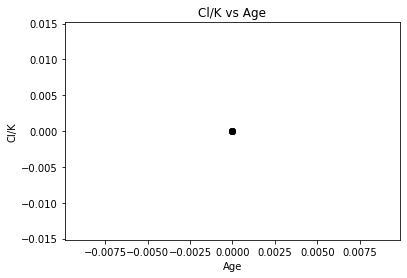

In [1033]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')

Text(0, 0.5, 'Ca/K')

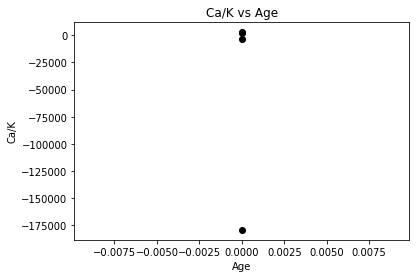

In [1034]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')

Text(0, 0.5, 'Cl/K')

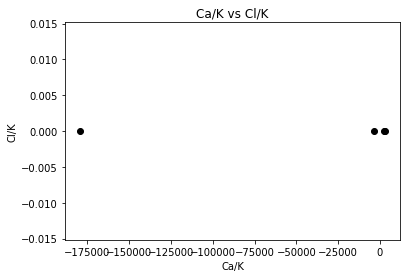

In [1035]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')

In [1036]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

Text(0, 0.5, '36Ar/39Ar')

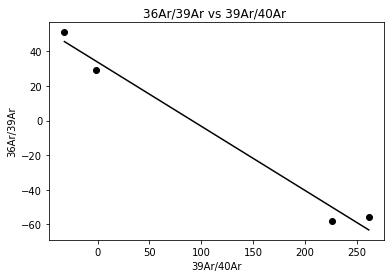

In [1037]:
plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [1038]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = 91.1998013242437
y_intercept = 33.794383147389155
slope = -0.37055325402781963


Crea Spectrum Age plot 

In [1039]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()

In [1040]:
cumulative_df = pd.DataFrame(cumulative)
cumulative_df

,% 39Ar
0,0.949335
1,6.414888
2,18.538253
3,23.324944
4,29.469359
5,38.776519
6,54.825207
7,74.556935
8,86.014338
9,100.000000


In [1041]:
# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])
age_più_2error_df

,Age+2error
0,0.157473
1,199.177132
2,NaN
3,0.022596
4,0.015881
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [1042]:
# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])
age_meno_2error_df

,Age-2error
0,-0.157473
1,-199.177131
2,NaN
3,-0.022596
4,-0.015881
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [1043]:
# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns
double_cumulative_df

,% 39Ar
0,0.949335
1,0.949335
2,6.414888
3,6.414888
4,18.538253
5,18.538253
6,23.324944
7,23.324944
8,29.469359
9,29.469359


In [1044]:
# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})
double_cumulative_df

,Cum%39
0,0.949335
1,0.949335
2,6.414888
3,6.414888
4,18.538253
5,18.538253
6,23.324944
7,23.324944
8,29.469359
9,29.469359


In [1045]:
# Cancella l'ultima riga di (Cum%39)
print(double_cumulative_df.index[-1])
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=double_cumulative_df.index[-1]))
double_cumulative_df

19


,Cum%39
0,0.949335
1,0.949335
2,6.414888
3,6.414888
4,18.538253
5,18.538253
6,23.324944
7,23.324944
8,29.469359
9,29.469359


In [1046]:
# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index
double_cumulative_df


,Cum%39
0,0.000000
1,0.949335
2,0.949335
3,6.414888
4,6.414888
5,18.538253
6,18.538253
7,23.324944
8,23.324944
9,29.469359


In [1047]:
# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns
double_age_più_2error_df

,Age+2error
0,0.157473
1,0.157473
2,199.177132
3,199.177132
4,NaN
5,NaN
6,0.022596
7,0.022596
8,0.015881
9,0.015881


In [1048]:
# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns
double_age_meno_2error_df

,Age-2error
0,-0.157473
1,-0.157473
2,-199.177131
3,-199.177131
4,NaN
5,NaN
6,-0.022596
7,-0.022596
8,-0.015881
9,-0.015881


In [1049]:
# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']
double_cumulative_df

,Cum%39,Age+2error,Age-2error
0,0.000000,0.157473,-0.157473
1,0.949335,0.157473,-0.157473
2,0.949335,199.177132,-199.177131
3,6.414888,199.177132,-199.177131
4,6.414888,NaN,NaN
5,18.538253,NaN,NaN
6,18.538253,0.022596,-0.022596
7,23.324944,0.022596,-0.022596
8,23.324944,0.015881,-0.015881
9,29.469359,0.015881,-0.015881


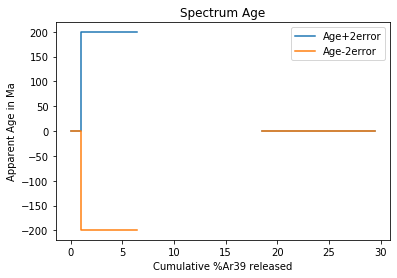

In [1050]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error')
plt.title('Spectrum Age')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age in Ma')
plt.legend()

In [1052]:
with pd.ExcelWriter('../documents/CalcolAr-OT-T9-new_pycalcolar.xlsx') as writer:
    results_data.to_excel(writer, sheet_name='Pycalcolar results')